In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [23]:
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from bench_utils import Experiment

common_y_label = "walltime in seconds"

### Dimension cross

No handles with labels found to put in legend.


Empty DataFrame
Columns: [samples, variants, population, pca, pc_relate, result_num_rows]
Index: []


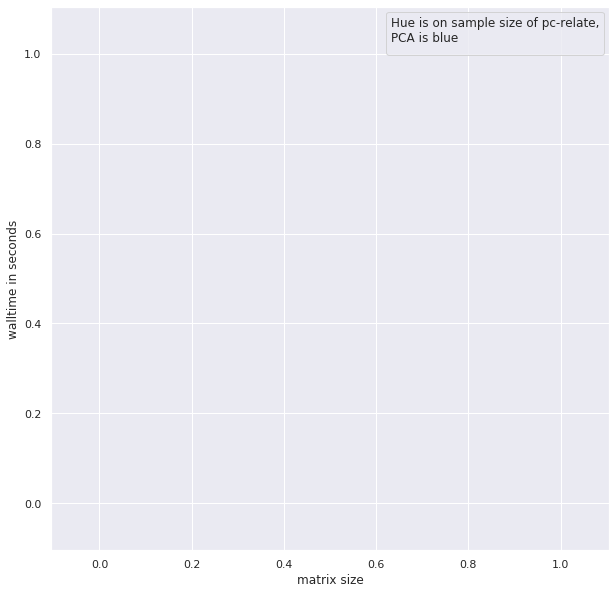

In [24]:
e = Experiment("simple_pop_10_1000_to_10000_cross_cpu_8_ram_31")
m_cross_1_5 = pd.read_csv(e.experiment_file)
print(m_cross_1_5.head())

plt.figure(figsize=(10, 10))
m_cross_1_5["sxv"] = m_cross_1_5.samples * m_cross_1_5.variants
p = sns.scatterplot(x="sxv", y="pca", data=m_cross_1_5, color="b", s=50)
p = sns.scatterplot(x="sxv", y="pc_relate", data=m_cross_1_5, color="r", s=50, hue="samples", legend="full")
p.set(xlabel="matrix size", ylabel=common_y_label)
p.legend(title="Hue is on sample size of pc-relate,\nPCA is blue")

### Fixed variants (10k)

   samples  variants  population    pca  pc_relate
0     1000     10000          10  15.42      29.68
1     1500     10000          10  11.48      56.81
2     2000     10000          10   9.40      95.90
3     2500     10000          10  14.82     149.26
4     3000     10000          10  13.18     206.47


[Text(0, 0.5, 'walltime in seconds'), Text(0.5, 1.0, 'Fixed variants = 10k')]

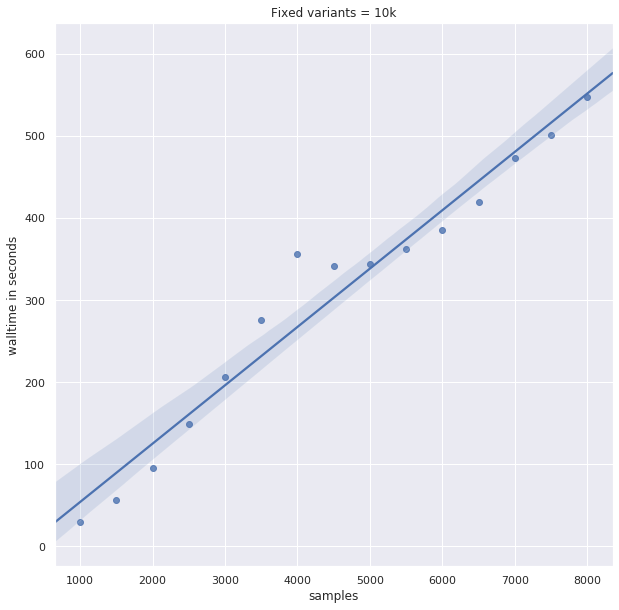

In [8]:
e_2 = Experiment("simple_fixed_variants_10k_cpu_8_ram_31")
fixed_variants = pd.read_csv(e_2.experiment_file)
print(fixed_variants.head())

plt.figure(figsize=(10, 10))
p = sns.regplot(x="samples", y="pc_relate", data=fixed_variants)
p.set(ylabel=common_y_label, title="Fixed variants = 10k")

### Fixed variants (2k)

   samples  variants  population    pca  pc_relate  result_num_rows
0     1000      2000          10   7.97      11.25           499500
1     1500      2000          10   6.76      19.34          1124250
2     2000      2000          10   7.59      32.37          1999000
3     2500      2000          10   7.72      52.15          3123750
4     3000      2000          10  11.43      68.88          4498500


[Text(0, 0.5, 'walltime in seconds'), Text(0.5, 1.0, 'Fixed variants = 2k')]

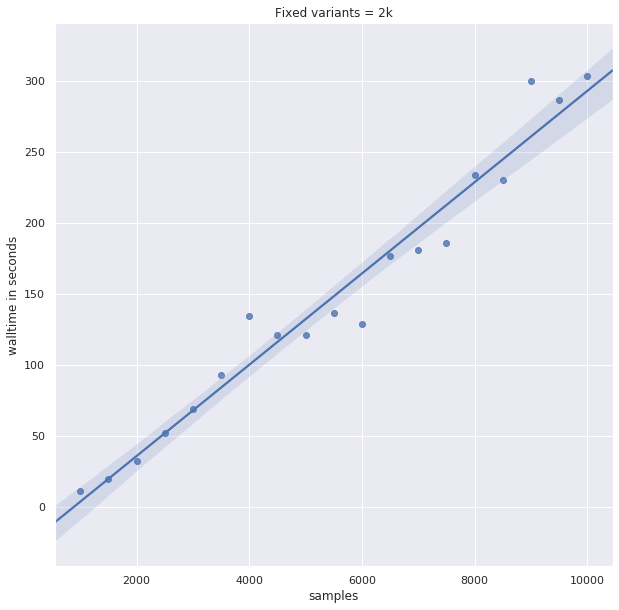

In [18]:
e_5 = Experiment("simple_fixed_variants_2k_cpu_8_ram_31")
fixed_variants_2k = pd.read_csv(e_5.experiment_file)
print(fixed_variants_2k.head())

plt.figure(figsize=(10, 10))
p = sns.regplot(x="samples", y="pc_relate", data=fixed_variants_2k)
p.set(ylabel=common_y_label, title="Fixed variants = 2k")

### Fixed samples (2k)

   samples  variants  population    pca  pc_relate
0     2000      1000          10  15.29      48.19
1     2000      1500          10   6.68      46.95
2     2000      2000          10   8.16      49.94
3     2000      2500          10   7.73      53.26
4     2000      3000          10   8.76      56.36


[Text(0, 0.5, 'walltime in seconds'), Text(0.5, 1.0, 'Fixed samples = 2k')]

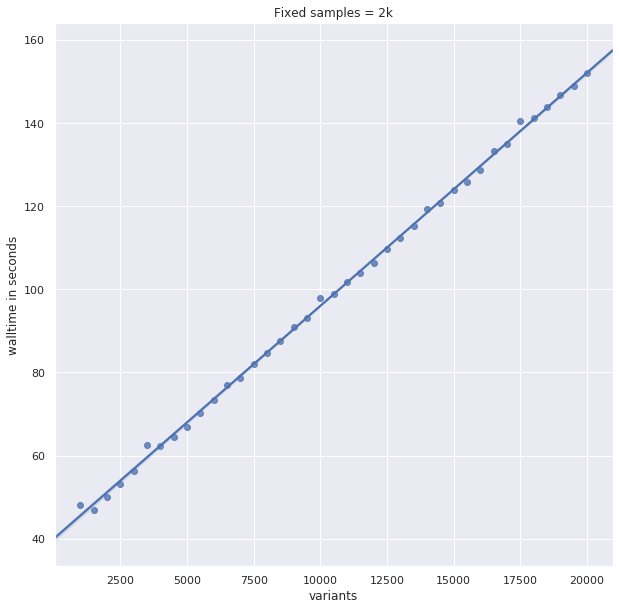

In [10]:
e_3 = Experiment("simple_fixed_samples_20k_cpu_8_ram_31")
fixed_samples = pd.read_csv(e_3.experiment_file)
print(fixed_samples.head())

plt.figure(figsize=(10, 10))
p = sns.regplot(x="variants", y="pc_relate", data=fixed_samples)
p.set(ylabel=common_y_label, title="Fixed samples = 2k")

### Fixed sample vs fixed variants (2k)

[Text(0, 0.5, 'walltime in seconds'),
 Text(0.5, 1.0, 'Fixed samples vs variants (const 2k)')]

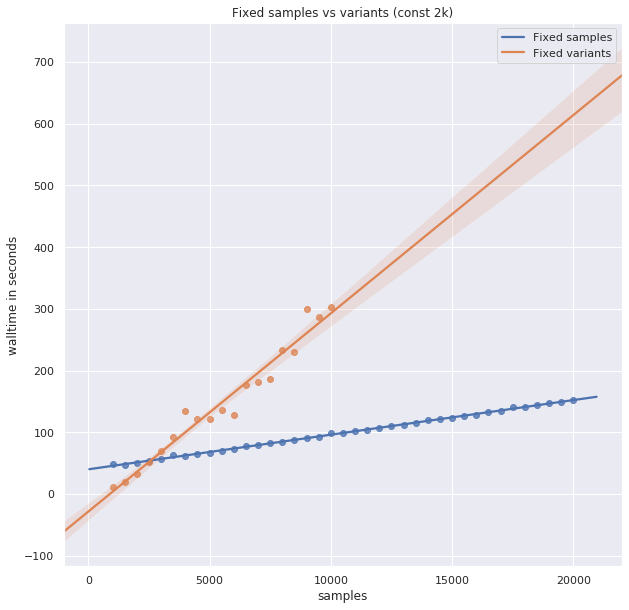

In [20]:
plt.figure(figsize=(10, 10))
p = sns.regplot(x="variants", y="pc_relate", data=fixed_samples)
p = sns.regplot(x="samples", y="pc_relate", data=fixed_variants_2k, ax=p)
p.legend(["Fixed samples", "Fixed variants"])
p.set(ylabel=common_y_label, title="Fixed samples vs variants (const 2k)")

### 1:5 sample to variants

   samples  variants  population    pca  pc_relate
0     1000      5000          10  10.46      20.21
1     1000      5000          10  10.59      20.91
2     2000     10000          10   9.91      94.26
3     3000     15000          10  17.08     264.45
4     4000     20000          10  22.88     562.21


[Text(0, 0.5, 'walltime in seconds'),
 Text(0.5, 0, 'variants (samples=variants/5)')]

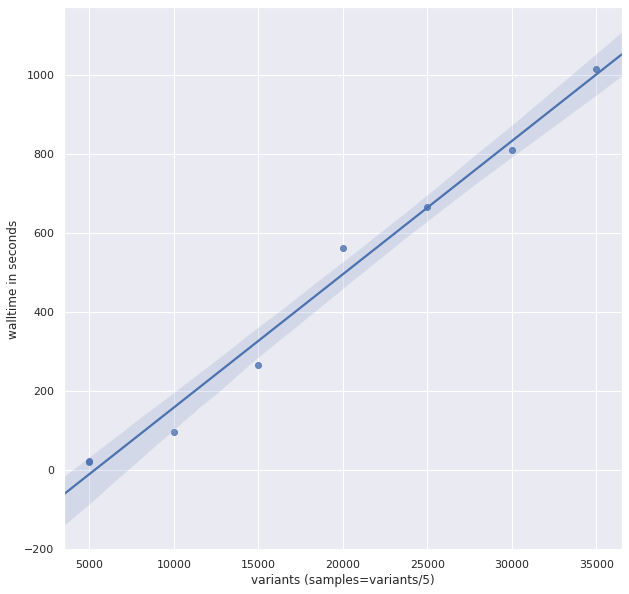

In [7]:
e_4 = Experiment("simple_1_to_5_sample_to_variant_cpu_8_ram_31")
m_1_to_5 = pd.read_csv(e_4.experiment_file)
print(m_1_to_5.head())

plt.figure(figsize=(10, 10))
p = sns.regplot(x="variants", y="pc_relate", data=m_1_to_5)
p.set(ylabel=common_y_label, xlabel="variants (samples=variants/5)")